<a href="https://colab.research.google.com/github/krishbhowmick/MadeTourEasy_DataAnalyst/blob/main/MTE_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
## Import Data

#path = '/content/drive/My Drive/DataScience_DataSet/IITB_Data/insurance.csv'  # ADD path/to/dataset


data = pd.read_csv('/content/drive/My Drive/DataScience_DataSet/IITB_Data/insurance.csv', header=None)                                                      # Read the data
data.shape 

(1339, 7)

In [ ]:
data.head() 

,0,1,2,3,4,5,6
0,age,sex,bmi,children,smoker,region,charges
1,19,female,27.9,0,yes,southwest,16884.924
2,18,male,33.77,1,no,southeast,1725.5523
3,28,male,33,3,no,southeast,4449.462
4,33,male,22.705,0,no,northwest,21984.47061


In [ ]:
data = pd.read_csv('/content/drive/My Drive/DataScience_DataSet/IITB_Data/insurance.csv', sep='joursep', header=0)                                                      # Read the data
#df = pd.read_csv('yourfile.csv', sep='joursep', header=0) 
data.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


(1338, 1)

In [ ]:
data.head() 

,"age,sex,bmi,children,smoker,region,charges"
0,"19,female,27.9,0,yes,southwest,16884.924"
1,"18,male,33.77,1,no,southeast,1725.5523"
2,"28,male,33,3,no,southeast,4449.462"
3,"33,male,22.705,0,no,northwest,21984.47061"
4,"32,male,28.88,0,no,northwest,3866.8552"


In [ ]:
path='/content/drive/My Drive/DataScience_DataSet/IITB_Data/iris.csv'
#cancer = pd.read_csv(path, header=None)
#cancer.head() 

In [ ]:
#cancer = pd.read_csv(path, sep='joursep', header=0)
#cancer.head() 

In [ ]:

iris = pd.read_csv(path, skiprows=1, header=None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
iris.columns = ['a','b','c','d','e']
iris.dropna(how='all', inplace=True)
iris.head()

,a,b,c,d,e
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
# Standarization of data
x= iris.iloc[:, 0:4].values
y= iris.iloc[:, 4].values
#y

In [ ]:
from sklearn.preprocessing import StandardScaler
x= StandardScaler().fit_transform(x)                    # Standarization
#x

In [ ]:
# Compute Eigenvectors and Eigenvalues
#Principle Components
cov_max=np.cov(x.T)    #CovarianceMatrix
print("CovarianceMatrix: \n", cov_max)

CovarianceMatrix: 
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [ ]:
#Eigen decomposition of the covariance matrix

eigen_values, eigen_vectors =np.linalg.eig(cov_max) 
print("EigenVectors: \n", eigen_vectors)
print("EigenValues: \n", eigen_values)

EigenVectors: 
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]
EigenValues: 
 [2.93808505 0.9201649  0.14774182 0.02085386]


In [ ]:
# Singular Value Composition- It's telling you which direction you are going (+ve dir or -ve dir)
#eigen values square-s , 
eigen_vectors_svd, s, v = np.linalg.svd(x.T)
print(eigen_vectors_svd)
#print(s)
#print(v)

[[-0.52106591 -0.37741762  0.71956635  0.26128628]
 [ 0.26934744 -0.92329566 -0.24438178 -0.12350962]
 [-0.5804131  -0.02449161 -0.14212637 -0.80144925]
 [-0.56485654 -0.06694199 -0.63427274  0.52359713]]


In [ ]:
# Picking Principal Components Using the Explained variance

for val in eigen_values:
  print(val)



2.9380850501999953
0.9201649041624852
0.1477418210449476
0.020853862176463147


In [ ]:
variance_explained = [(i/sum(eigen_values))* 100 for i in eigen_values]
variance_explained

[72.9624454132999, 22.850761786701725, 3.668921889282867, 0.5178709107155016]

In [ ]:
cumulative_variance_explained = np.cumsum(variance_explained)
cumulative_variance_explained

array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

AttributeError: ignored

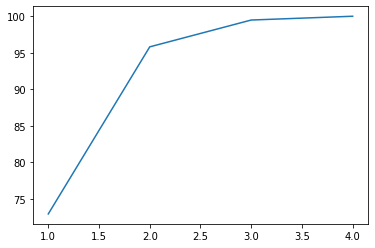

In [ ]:
sb.lineplot(x=[1,2,3,4], y=cumulative_variance_explained )
plt.xlable("No of components")
plt.ylable("cumulative_variance_explained")
plt.title("Explained variance vs number of components")
plt.show()

In [ ]:
# Project data onto Lower-Dimensional Linear Subsapace
# Xpca = X.W

eigen_vectors


array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [ ]:
projection_matrix = (eigen_vectors.T[:][:])[:2].T
projection_matrix

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [ ]:
x_pca = x.dot(projection_matrix)

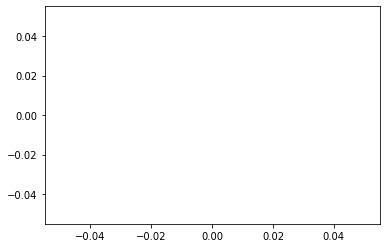

In [ ]:
#for species in ('Iris-setosa','Iris-versicolor','Iris-virginica'):
for e in ('setosa','versicolor','virginica'):
  sb.scatterplot(x_pca[y==species,0],
                  x_pca[y==species,1])